**Customer Segmentation RFM Analyst**

RFM metrics is a marketing analysis tool used to identify a company's or an organization's best customers by measuring and analyzing spending habits. RFM analyst evaluates clients and customers by scoring them in  three quantitative factors:

1. R is Recency: How recently a customer has made a purchase
2. F is Frequency: How often a customer makes a purchase
3. M is Monetary Value: How much money a customer spends on purchases

# Import libraries & check Dataframe

In [814]:
#Processing libraries
import pandas as pd
import numpy as np

#visualizing libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##df_order

In [815]:
df_order = pd.read_excel('order_transactions.xlsx')
df_order.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [816]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

##df Customer

In [817]:
df_cust = pd.read_csv('customer_data.csv')
df_cust.head(2)

,Customer ID,Gender,Marital Status,Salary,Age,Occupation,Customer Name,Region
0,FC-14335,Male,Not Married,2468.0,28.0,Senior Customer Relation,Fred Chung,West
1,JP-15520,Female,Married,3198.0,54.0,BOD,Jeremy Pistek,West


In [818]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer ID     793 non-null    object 
 1   Gender          793 non-null    object 
 2   Marital Status  793 non-null    object 
 3   Salary          776 non-null    float64
 4   Age             767 non-null    float64
 5   Occupation      775 non-null    object 
 6   Customer Name   793 non-null    object 
 7   Region          793 non-null    object 
dtypes: float64(2), object(6)
memory usage: 49.7+ KB


#Preparation

##df order

In [819]:
df_order.duplicated().any()

False

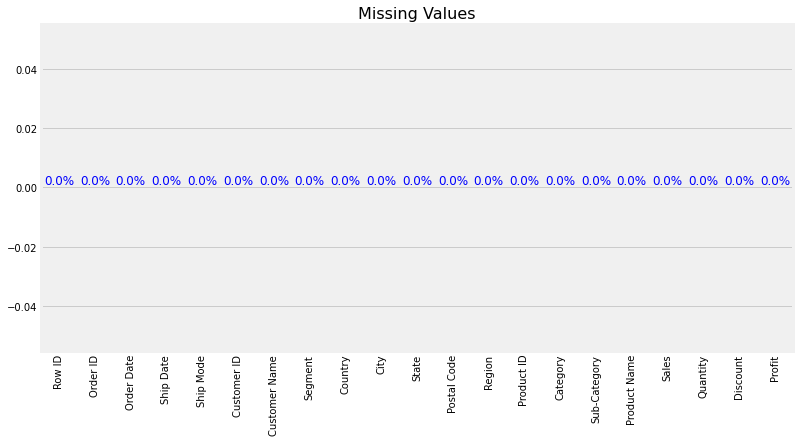

In [820]:
#check
plt.figure(figsize=(12,6))
g = sns.barplot(x=df_order.columns, y=df_order.isna().sum())
plt.xticks(rotation=90)
plt.title('Missing Values', size=16)
for bar in g.patches:
  value = bar.get_height()
  persentase= round((value/len(df_order))*100,2)

  text=f"{persentase}%"
  textX=bar.get_x()+ bar.get_width()/2
  textY=bar.get_y() + value

  g.text(textX, textY, text, ha='center', va='bottom', color='b', size=12)

plt.show()

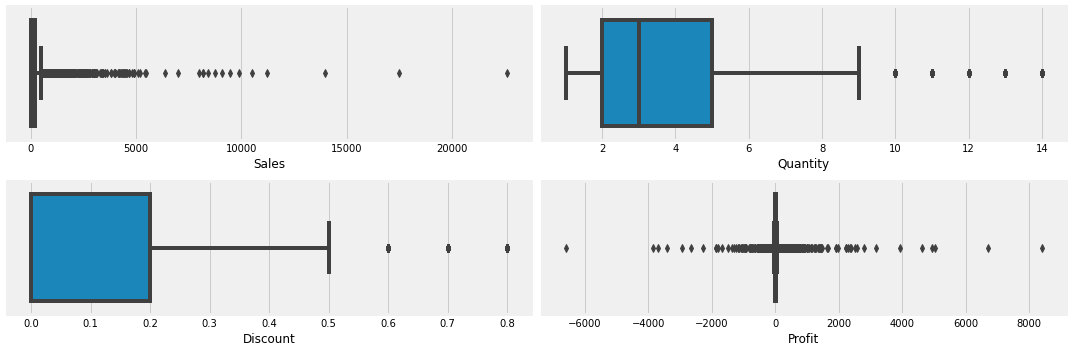

In [821]:
#Checking Outlier
i = 0
j=0
fig, axes = plt.subplots(2, 2, figsize = (15, 5))
for col in df_order.columns :
  if df_order[col].dtype=='float64' or df_order[col].dtype=='int64':
    if col !='Row ID' and col !='Postal Code':
      sns.boxplot(df_order[col], ax = axes[i,j])
      if j == 1 :
        j = 0
        i += 1
      else :
        j += 1
plt.tight_layout()

In [822]:
for col in df_order.columns :
    if col =='Sales' or col == 'Profit':
      q1=round(np.percentile(df_order[col],25),2)
      q3=round(np.percentile(df_order[col],75),2)
      iqr=q3-q1
      lb=q1-1.5*iqr
      ub=q3+1.5*iqr
      df_order.loc[df_order[col] < lb, col] = lb
      df_order.loc[df_order[col] > ub, col] = ub

##df customer

Duplcate

In [823]:
df_cust.duplicated().any()

False

Mising Value

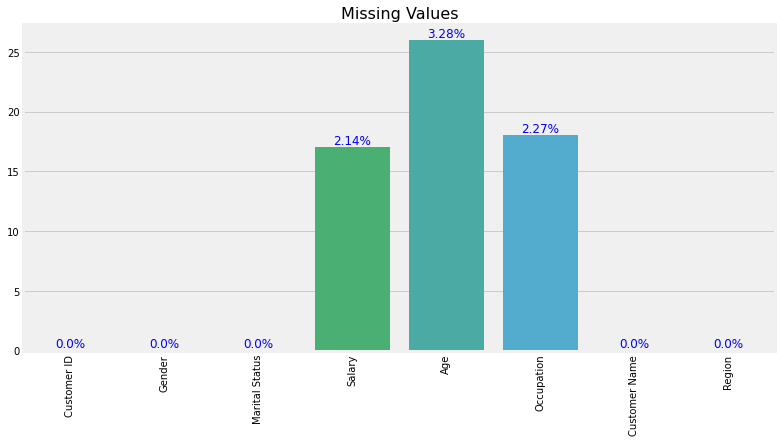

In [824]:
#check
plt.figure(figsize=(12,6))
g = sns.barplot(x=df_cust.columns, y=df_cust.isna().sum())
plt.xticks(rotation=90)
plt.title('Missing Values', size=16)
for bar in g.patches:
  value = bar.get_height()
  persentase= round((value/len(df_cust))*100,2)

  text=f"{persentase}%"
  textX=bar.get_x()+ bar.get_width()/2
  textY=bar.get_y() + value

  g.text(textX, textY, text, ha='center', va='bottom', color='b', size=12)

plt.show()

In [825]:
#handling
dfmissing = pd.Series(df_cust.isna().sum().sort_values(ascending=False))
dfmissing = dfmissing[dfmissing != 0]

#replace Missing value numerical feature with median value and categorical feature with most value
for col in dfmissing.index:
  if df_cust[col].dtype == 'object':             #categorical
    df_cust[col] = df_cust[col].fillna(df_cust[col].mode()[0])
  else:                                     #mumerical
    df_cust[col] = df_cust[col].fillna(df_cust[col].median())

Outlier

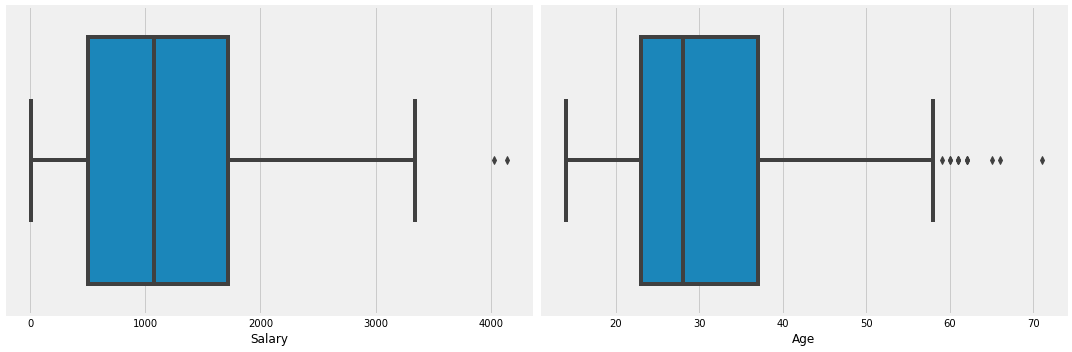

In [826]:
#Checking Outlier
i = 0
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
for col in df_cust.columns :
  if df_cust[col].dtype=='float64':
    if col !='Customer ID':
      sns.boxplot(df_cust[col], ax = axes[i])
      i += 1
plt.tight_layout()

## Join Dataframe

In [827]:
data = df_order.merge(df_cust, how='left', on=['Customer ID'])
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name_x,Segment,Country,City,State,Postal Code,Region_x,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Gender,Marital Status,Salary,Age,Occupation,Customer Name_y,Region_y
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,Female,Divorced,2468.0,43.0,Senior Customer Relation,Claire Gute,Central
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",498.93,3,0.0,70.8050,Female,Divorced,2468.0,43.0,Senior Customer Relation,Claire Gute,Central


# EDA

How many items were sold and the profit from each category

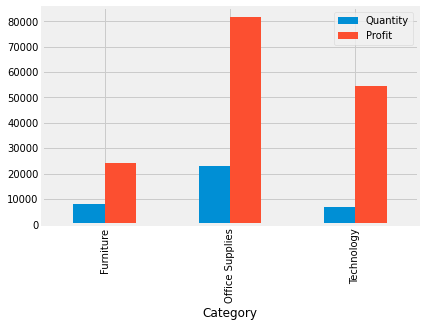

In [828]:
data.groupby('Category').agg({'Quantity': 'sum', 'Profit':'sum'}).plot(kind='bar')

Profit distribution

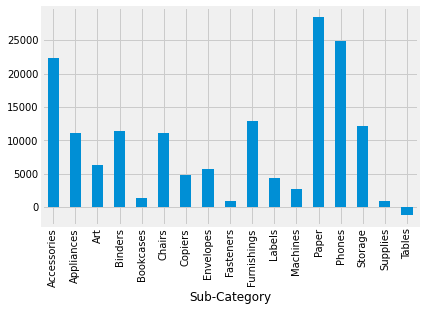

In [829]:
data.groupby('Sub-Category')['Profit'].sum().plot(kind='bar')

# Data Preprocessing

In [830]:
df_cust.head()

,Customer ID,Gender,Marital Status,Salary,Age,Occupation,Customer Name,Region
0,FC-14335,Male,Not Married,2468.0,28.0,Senior Customer Relation,Fred Chung,West
1,JP-15520,Female,Married,3198.0,54.0,BOD,Jeremy Pistek,West
2,SR-20425,Female,Married,502.0,21.0,Self Employed,Sharelle Roach,West
3,ST-20530,Male,Married,1365.0,46.0,Officer,Shui Tom,East
4,JL-15130,Male,Not Married,431.0,16.0,Staff,Jack Lebron,South


Melakukan binning terhadap kolom salary dan age

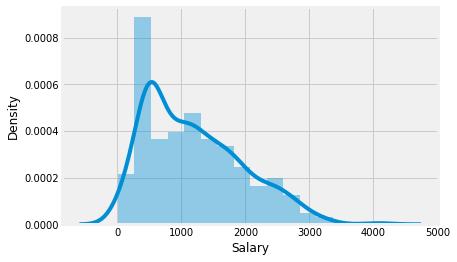

In [831]:
sns.distplot(df_cust['Salary'])

In [832]:
df_cust['Salary'] = pd.cut(df_cust['Salary'], bins=[0, 1000, 2000, 3000, 4000, 5000], labels=['0-999', '1000-1999', '2000-2999', '3000-3999', '4000+'])
df_cust.head(3)

,Customer ID,Gender,Marital Status,Salary,Age,Occupation,Customer Name,Region
0,FC-14335,Male,Not Married,2000-2999,28.0,Senior Customer Relation,Fred Chung,West
1,JP-15520,Female,Married,3000-3999,54.0,BOD,Jeremy Pistek,West
2,SR-20425,Female,Married,0-999,21.0,Self Employed,Sharelle Roach,West


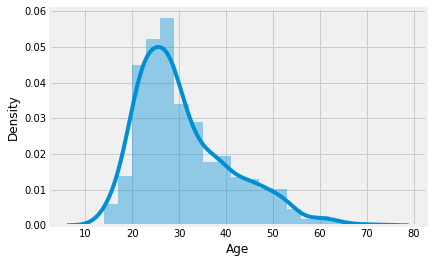

In [833]:
sns.distplot(df_cust['Age'])

In [834]:
df_cust['Age'] = pd.cut(df_cust['Age'], bins=[10,25,40,60,80], labels=['10-24', '25-39', '40-59', '60+'])
df_cust.head()

,Customer ID,Gender,Marital Status,Salary,Age,Occupation,Customer Name,Region
0,FC-14335,Male,Not Married,2000-2999,25-39,Senior Customer Relation,Fred Chung,West
1,JP-15520,Female,Married,3000-3999,40-59,BOD,Jeremy Pistek,West
2,SR-20425,Female,Married,0-999,10-24,Self Employed,Sharelle Roach,West
3,ST-20530,Male,Married,1000-1999,40-59,Officer,Shui Tom,East
4,JL-15130,Male,Not Married,0-999,10-24,Staff,Jack Lebron,South


In [835]:
df_cust.drop(columns=['Customer Name'], inplace=True)
df_cust = df_cust.set_index('Customer ID')
df_cust.head(3)

,Gender,Marital Status,Salary,Age,Occupation,Region
Customer ID,,,,,,
FC-14335,Male,Not Married,2000-2999,25-39,Senior Customer Relation,West
JP-15520,Female,Married,3000-3999,40-59,BOD,West
SR-20425,Female,Married,0-999,10-24,Self Employed,West


# Modeling

In [836]:
from kmodes.kmodes import KModes

**Elbow Method**

In [837]:
cost = []
K = range(1,10)

for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init='random', n_init=5, verbose=1)
    kmode.fit_predict(df_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2791.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 194, cost: 2140.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 67, cost: 2235.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...

Text(0.5, 0, 'Num of Clusters')

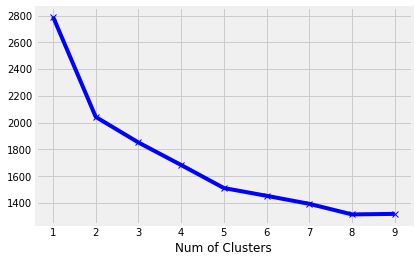

In [838]:
plt.plot(K, cost, 'bx-')
plt.xlabel('Num of Clusters')

In [839]:
#modeling ulang
kmode = KModes(n_clusters=5, init='random', n_init=5, verbose=1, random_state=42)
clusters = kmode.fit_predict(df_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 248, cost: 1669.0
Run 1, iteration: 2/100, moves: 217, cost: 1637.0
Run 1, iteration: 3/100, moves: 14, cost: 1637.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 280, cost: 1545.0
Run 2, iteration: 2/100, moves: 61, cost: 1545.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 194, cost: 1619.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 238, cost: 1580.0
Run 4, iteration: 2/100, moves: 30, cost: 1580.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 83, cost: 1593.0
Best run was number 2


In [841]:
df_cust['Cluster'] = clusters
df_cust.groupby('Cluster').describe()

Gender                      ... Region                     
         count unique     top freq  ...  count unique      top freq
Cluster                             ...                            
0          264      2  Female  204  ...    264      4     East  114
1          192      2  Female  151  ...    192      4     West  102
2          149      2    Male  137  ...    149      4     East   83
3          126      2    Male  107  ...    126      4     West   67
4           62      2    Male   47  ...     62      4  Central   23

[5 rows x 24 columns]

#### Summary Cluster

- Cluster 0 : Perempuan berusia 10-24 dan sudah menikah, pekerjaan self employed dengan range salary 0-999 di region East
- Cluster 1 : Perempuan berusia 25-39 dan Belum/Tidak menikah, pekerjaan customer analyst dengan range salary 1000-1999 di region West
- Cluster 2 : laki-laki berusia 25-39 dan Belum/Tidak menikah, pekerjaan Officer dengan range salary 1000-1999 di region East
- Cluster 3 : Laki-laki berusia 10-24 dan Belum/Tidak menikah, pekerjaan Customer Service dengan range salary 0-999 di region West
- Cluster 4 : Laki-laki berusia 25-39 dan Belum/Tidak menikah, pekerjaan Customer Service Relation dengan range salary 2000-2999 di region Central



In [535]:
df_cust.head()

,Gender,Marital Status,Salary,Age,Occupation,Region,Cluster
Customer ID,,,,,,,
FC-14335,Male,Not Married,2000-2999,25-39,Senior Customer Relation,West,2
JP-15520,Female,Married,3000-3999,40-59,BOD,West,0
SR-20425,Female,Married,0-999,10-24,Self Employed,West,0
ST-20530,Male,Married,1000-1999,40-59,Officer,East,5
JL-15130,Male,Not Married,0-999,10-24,Staff,South,3


In [842]:
df_cust['Cluster'] = df_cust['Cluster'].map({0:'Perempuan berusia 10-24 dan sudah menikah, pekerjaan self employed dengan range salary 0-999 di region East',
                                             1 :'Perempuan berusia 25-39 dan Belum/Tidak menikah, pekerjaan customer analyst dengan range salary 1000-1999 di region West',
                                             2 :'Laki-laki berusia 25-39 dan Belum/Tidak menikah, pekerjaan Officer dengan range salary 1000-1999 di region East',
                                             3 :'Laki-laki berusia 10-24 dan Belum/Tidak menikah, pekerjaan Customer Service dengan range salary 0-999 di region West',
                                             4: 'Laki-laki berusia 25-39 dan Belum/Tidak menikah, pekerjaan Customer Service Relation dengan range salary 2000-2999 di region Central'})
df_cust.head()

,Gender,Marital Status,Salary,Age,Occupation,Region,Cluster
Customer ID,,,,,,,
FC-14335,Male,Not Married,2000-2999,25-39,Senior Customer Relation,West,Laki-laki berusia 25-39 dan Belum/Tidak menika...
JP-15520,Female,Married,3000-3999,40-59,BOD,West,"Perempuan berusia 10-24 dan sudah menikah, pek..."
SR-20425,Female,Married,0-999,10-24,Self Employed,West,"Perempuan berusia 10-24 dan sudah menikah, pek..."
ST-20530,Male,Married,1000-1999,40-59,Officer,East,Laki-laki berusia 25-39 dan Belum/Tidak menika...
JL-15130,Male,Not Married,0-999,10-24,Staff,South,Laki-laki berusia 10-24 dan Belum/Tidak menika...


#Prep RFM Analysis

In [882]:
df_order.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",498.93,3,0.0,70.8050


In [883]:
rfm_prep = df_order[['Customer ID', 'Order Date', 'Sales']]
rfm_prep.head(3)

,Customer ID,Order Date,Sales
0,CG-12520,2016-11-08,261.96
1,CG-12520,2016-11-08,498.93
2,DV-13045,2016-06-12,14.62


In [884]:
rfm_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Customer ID  9994 non-null   object        
 1   Order Date   9994 non-null   datetime64[ns]
 2   Sales        9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 234.4+ KB


#### Recency

In [885]:
last_transaction = rfm_prep['Order Date'].max()
recency = rfm_prep.groupby('Customer ID')['Order Date'].max().reset_index(name='Last Order Date')
recency['recency'] = last_transaction - recency['Last Order Date']
recency['recency'] = recency['recency'].astype('str')
recency['recency'] = recency['recency'].str.replace(' days', '')
recency['recency'] = recency['recency'].astype('float64')
recency.head(3)

,Customer ID,Last Order Date,recency
0,AA-10315,2017-06-29,184.0
1,AA-10375,2017-12-11,19.0
2,AA-10480,2017-04-15,259.0


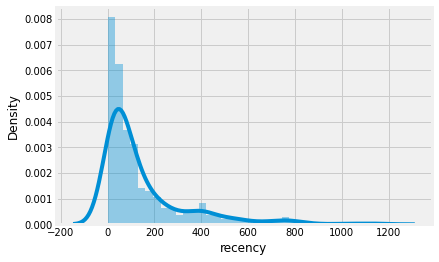

In [886]:
sns.distplot(recency['recency'])

#### Frequency

In [887]:
frequency = rfm_prep.groupby('Customer ID')['Sales'].count().reset_index(name='frequency')
frequency.head(3)

,Customer ID,frequency
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12


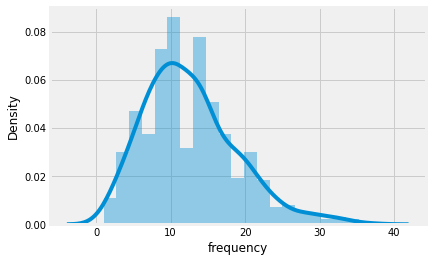

In [888]:
sns.distplot(frequency['frequency'])

#### Monetary

In [889]:
monetary = rfm_prep.groupby('Customer ID')['Sales'].sum().reset_index(name='monetary')
monetary.head(3)

,Customer ID,monetary
0,AA-10315,1957.780
1,AA-10375,1055.340
2,AA-10480,1790.512


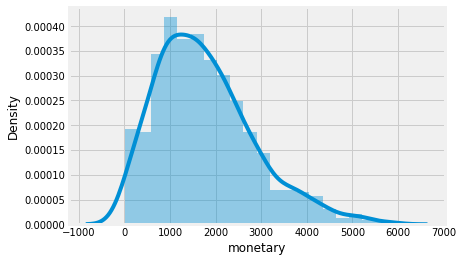

In [890]:
sns.distplot(monetary['monetary'])

#### Gabungkan recency, frequency, dan monetary

In [891]:
recency.drop(columns=['Last Order Date'], inplace=True)
df_1 = recency.merge(frequency, how='left', on='Customer ID')
rfm_df = df_1.merge(monetary, how='left', on='Customer ID')
rfm_df.head(3)

,Customer ID,recency,frequency,monetary
0,AA-10315,184.0,11,1957.780
1,AA-10375,19.0,15,1055.340
2,AA-10480,259.0,12,1790.512


# Modeling RFM

In [892]:
from sklearn.cluster import KMeans
import math

**Menentukan jumlah cluster menggunakan elbow method**

Recency

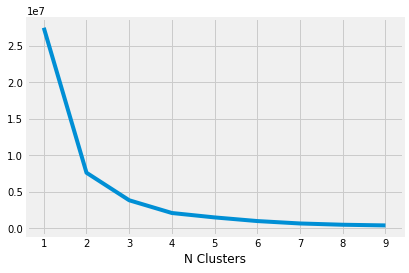

In [893]:
sse = {}
for i in range(1, 10):
    model = KMeans(n_clusters=i, max_iter=1000).fit(recency[['recency']]) #training
    sse[i] = model.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('N Clusters')
plt.show()

Frequency

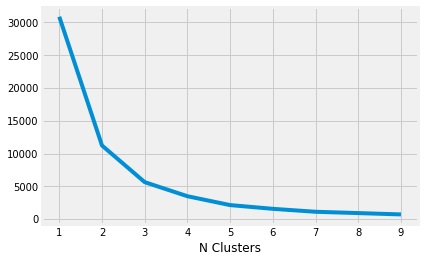

In [894]:
sse = {}
for i in range(1, 10):
    model = KMeans(n_clusters=i, max_iter=1000).fit(frequency[['frequency']]) #training
    sse[i] = model.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('N Clusters')
plt.show()

Monetary

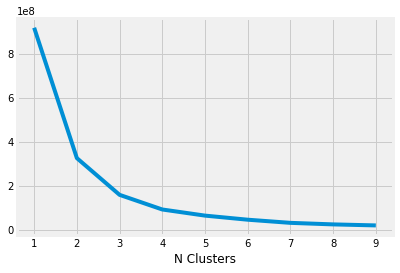

In [895]:
sse = {}
for i in range(1, 10):
    model = KMeans(n_clusters=i, max_iter=1000).fit(monetary[['monetary']]) #training
    sse[i] = model.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('N Clusters')
plt.show()

Baik recency, frequency, maupun monetary ketiganya kita tentukan memiliki jumlah cluster sama dengan 3

In [896]:
model_r = KMeans(n_clusters=3, max_iter=1000).fit(recency[['recency']])
recency['recency_c'] = model_r.predict(recency[['recency']])
recency['recency_c'].value_counts()

1    626
0    132
2     35
Name: recency_c, dtype: int64

In [897]:
c_1 = recency.groupby('recency_c')['recency'].mean().reset_index()
c_1 = c_1.sort_values(by='recency', ascending=False).reset_index(drop=True)
c_1['index'] = c_1.index
c_1

,recency_c,recency,index
0,2,771.000000,0
1,0,359.992424,1
2,1,66.948882,2


In [898]:
recency.head()

,Customer ID,recency,recency_c
0,AA-10315,184.0,1
1,AA-10375,19.0,1
2,AA-10480,259.0,0
3,AA-10645,55.0,1
4,AB-10015,415.0,0


In [899]:
def reorder_cluster(var, target_var, df, ascending=True):
    
    df_new = df.groupby(var)[target_var].mean().reset_index()
    df_new = df_new.sort_values(by=target_var, ascending=ascending).reset_index(drop=True)
    
    df_new['index'] = df_new.index
    df_final = pd.merge(df, df_new[[var, 'index']], on=var)
    df_final = df_final.drop([var], axis=1)
    df_final = df_final.rename(columns={'index': var})
    return df_final

In [900]:
#recency
model_r = KMeans(n_clusters=3, max_iter=1000)
model_r.fit(rfm_df[['recency']])
rfm_df['recency_c'] = model_r.predict(rfm_df[['recency']])
rfm_df = reorder_cluster('recency_c', 'recency', rfm_df, ascending=False)

#frequency
model_f = KMeans(n_clusters=3, max_iter=1000)
model_f.fit(rfm_df[['frequency']])
rfm_df['frequency_c'] = model_f.predict(rfm_df[['frequency']])
rfm_df = reorder_cluster('frequency_c', 'frequency', rfm_df, ascending=True)

#monetary
model_m = KMeans(n_clusters=3, max_iter=1000)
model_m.fit(rfm_df[['monetary']])
rfm_df['monetary_c'] = model_m.predict(rfm_df[['monetary']])
rfm_df = reorder_cluster('monetary_c', 'monetary', rfm_df, ascending=True)

rfm_df.head()

,Customer ID,recency,frequency,monetary,recency_c,frequency_c,monetary_c
0,AA-10315,184.0,11,1957.780,2,1,1
1,AD-10180,29.0,12,2478.922,2,1,1
2,AF-10870,41.0,16,1888.998,2,1,1
3,AG-10675,97.0,15,1591.704,2,1,1
4,AH-10030,12.0,11,1575.470,2,1,1


In [901]:
rfm_df.groupby('frequency_c')['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
frequency_c,,,,,,,,
0,331.0,7.066465,2.385904,1.0,5.0,7.0,9.0,10.0
1,302.0,13.586093,1.891809,11.0,12.0,14.0,15.0,17.0
2,160.0,22.200000,4.146378,18.0,19.0,21.0,24.0,37.0


# Overall Scoring

In [902]:
rfm_df['Overall_Scoring'] = rfm_df['recency_c'] + rfm_df['frequency_c'] + rfm_df['monetary_c']
rfm_df.head(2)

,Customer ID,recency,frequency,monetary,recency_c,frequency_c,monetary_c,Overall_Scoring
0,AA-10315,184.0,11,1957.780,2,1,1,4
1,AD-10180,29.0,12,2478.922,2,1,1,4


In [903]:
rfm_df.groupby('Overall_Scoring').agg({'recency': 'mean',
                                      'frequency': 'mean',
                                      'monetary': 'mean'})

,recency,frequency,monetary
Overall_Scoring,,,
0,778.333333,4.833333,667.907625
1,395.533333,6.453333,726.915680
2,124.371859,7.663317,923.792915
3,119.060000,11.593333,1524.502047
4,74.982353,14.182353,2096.532141
5,81.445545,19.693069,2725.245692
6,60.635135,23.378378,3881.763926


In [904]:
rfm_df['segment_overall_scoring'] = ['A' if x >=5 else 'B' if x>=3 else 'C' for x in rfm_df['Overall_Scoring']]
rfm_df['segment_overall_scoring'].value_counts()

B    320
C    298
A    175
Name: segment_overall_scoring, dtype: int64

In [905]:
kolom_rfm = ['recency_c', 'frequency_c', 'monetary_c']

for kolom in kolom_rfm:
    rfm_df[kolom] = rfm_df[kolom].astype('str')

rfm_df['Scoring'] = rfm_df['recency_c'] + rfm_df['frequency_c'] + rfm_df['monetary_c']
rfm_df.head(3)

,Customer ID,recency,frequency,monetary,recency_c,frequency_c,monetary_c,Overall_Scoring,segment_overall_scoring,Scoring
0,AA-10315,184.0,11,1957.780,2,1,1,4,B,211
1,AD-10180,29.0,12,2478.922,2,1,1,4,B,211
2,AF-10870,41.0,16,1888.998,2,1,1,4,B,211


In [907]:
def cluster_rfm(x):
    if x['Scoring'] == '222':
        cat = 'Best Customer'
    elif x['Scoring'] == '221' or x['Scoring'] == '212' or x['Scoring'] == '122':
        cat = 'Top Customer'
    elif x['Scoring'] == '111':
        cat = 'Mid Customer'        
    elif x['Scoring'] == '102' or x['Scoring'] == '112'or x['Scoring'] == '012'or x['Scoring'] == '022':
        cat = 'Big Amount Sales'
    elif x['Scoring'] == '120' or x['Scoring'] == '121':
        cat = 'Loyal Customer'
    elif x['Scoring'] == '200' or x['Scoring'] == '210' or x['Scoring'] == '201' or x['Scoring'] =='211'or x['Scoring'] == '220':
        cat = 'Recent Customer'
    elif x['Scoring'] == '100' or x['Scoring'] == '101' or x['Scoring'] == '110':
        cat = 'Almost Lost'
    elif x['Scoring'] == '001' or x['Scoring'] == '011':
        cat = 'Lost Customer'
    elif x['Scoring'] == '000' or x['Scoring'] == '010':
        cat = 'Lost Cheap Customer'
    else:
        cat = 'Others'
    return cat

rfm_df['RFM_cluster'] = rfm_df.apply(lambda x: cluster_rfm(x), axis=1)

In [908]:
rfm_df.head()

,Customer ID,recency,frequency,monetary,recency_c,frequency_c,monetary_c,Overall_Scoring,segment_overall_scoring,Scoring,RFM_cluster
0,AA-10315,184.0,11,1957.780,2,1,1,4,B,211,Recent Customer
1,AD-10180,29.0,12,2478.922,2,1,1,4,B,211,Recent Customer
2,AF-10870,41.0,16,1888.998,2,1,1,4,B,211,Recent Customer
3,AG-10675,97.0,15,1591.704,2,1,1,4,B,211,Recent Customer
4,AH-10030,12.0,11,1575.470,2,1,1,4,B,211,Recent Customer


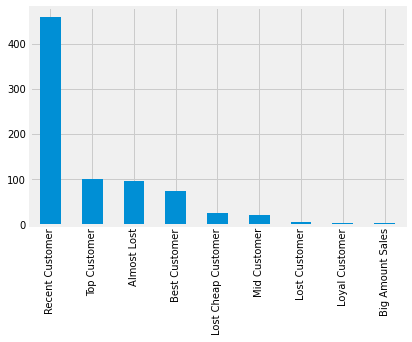

In [909]:
rfm_df['RFM_cluster'].value_counts().plot(kind='bar')

In [910]:
df_cust.reset_index(inplace=True)
df_cust.rename(columns={'Cluster': 'Cluster Demo'}, inplace=True)

In [911]:
cust_segment = df_cust.merge(rfm_df, how='left', on='Customer ID')
cust_segment.head(2)

,Customer ID,Gender,Marital Status,Salary,Age,Occupation,Region,Cluster Demo,recency,frequency,monetary,recency_c,frequency_c,monetary_c,Overall_Scoring,segment_overall_scoring,Scoring,RFM_cluster
0,FC-14335,Male,Not Married,2000-2999,25-39,Senior Customer Relation,West,Laki-laki berusia 25-39 dan Belum/Tidak menika...,184.0,10,1894.494,2,0,1,3,B,201,Recent Customer
1,JP-15520,Female,Married,3000-3999,40-59,BOD,West,"Perempuan berusia 10-24 dan sudah menikah, pek...",8.0,16,2839.736,2,1,1,4,B,211,Recent Customer


In [916]:
segment_result = cust_segment[['Customer ID', 'Cluster Demo', 'recency', 'frequency', 'monetary', 'segment_overall_scoring', 'RFM_cluster']]
segment_result.head(3)

,Customer ID,Cluster Demo,recency,frequency,monetary,segment_overall_scoring,RFM_cluster
0,FC-14335,Laki-laki berusia 25-39 dan Belum/Tidak menika...,184.0,10,1894.494,B,Recent Customer
1,JP-15520,"Perempuan berusia 10-24 dan sudah menikah, pek...",8.0,16,2839.736,B,Recent Customer
2,SR-20425,"Perempuan berusia 10-24 dan sudah menikah, pek...",8.0,9,1182.426,C,Recent Customer


In [913]:
segment_result.to_csv('customer_segmentation.csv', index=False)